![Washu Math](https://sites.wustl.edu/scao/files/2020/10/Screen-Shot-2020-10-25-at-1.03.49-PM.png)


# Math Circle Fall 2020 Introduction

Welcome to a math circle session like you have never seen before! Today we will learn how computers learn to tell cats from dogs using machine learning! and some Python language.

![](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)

If you have already registered on Kaggle, now please click the **COPY and EDIT** button on the upper right corner.
![](https://sites.wustl.edu/scao/files/2020/10/Screen-Shot-2020-10-25-at-1.09.19-PM.png)

This a markdown cell. We can write words in this cell. 

## Headers
Hello

### smaller header

In [ ]:
print("This is a code cell.")
print("Hello world")
print(f"Hello world, time is {3} o'clock")

In [ ]:
# Simple variable assignment
# This is a comment
# x variable like 3x = 5
x = 5/3

In [ ]:
y = x*3
print(y)

In [ ]:
# simple calculations
# ** means exponential
print(2**5)
print(2**3*3) # computer 2**3 first, 8 is multiplied with 3
print(1/2+1) # 1/2 first, +1 computed secondly

In [ ]:
print(2***5) # unfortunately tetration is not built-in Python

# Logic
Computer are really good at computing (recognizing numbers), following **EXACT and CLEAR** instructions. However, computer is not so good at many things (used to). For examples, recognizing cats and dogs from photos. 

![](https://storage.googleapis.com/kaggle-competitions/kaggle/3362/media/woof_meow.jpg)

In [ ]:
# browse the Cats vs dog competition

In [ ]:
# == vs =
a = 2 # we let a be 2

In [ ]:
type(a)

In [ ]:
dir(a)

In [ ]:
# == is checking whether a variable is equal to whatever on the right side of ==
a == 3

In [ ]:
s = 'David'
print(type(s))

In [ ]:
False is not True

In [ ]:
a = 5.
type(a)

In [ ]:
a = 7
type(a)

In [ ]:
s1 = [a, s]
print(s1)

In [ ]:
type({2,3})

In [ ]:
dict1 = {'Shuhao': 'instructor'}

In [ ]:
# simple logical checking == or using "is"
dict1['Shuhao'] == 'student'

In [ ]:
1 is 0

In [ ]:
# simple if-then condition
# flow control

if 1 is 1:
    print("1 is 1")

if 1 is 0:
    print("1 is 0")

In [ ]:
# range(a,b) the integer greater than or equal to a but less than b
for i in range(0,5):
    if i > 2: # press Tab to indent
        print(i)

# Computer can learn from examples!

Just like us! Imagine we are preparing an exam, teachers will give us some practice exams (with answers available), we will train ourselves by doing these practice problems, honing our skills, then in the actual exam, we will be able to tackle exam problems without knowing the answer beforehand (hopefully). The examples are call data.

First let us load some packages into our system.

In [ ]:
import os
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
dir(pandas)

In [ ]:
dir(pd)

In [ ]:
import site
site.getsitepackages()

In [ ]:
help(pd)

In [ ]:
print(os.listdir("../input/dogs-vs-cats/"))

Let us unzip the compressed images in the `train.zip` and `test1.zip` (this may take a while).

In [ ]:
!unzip -q '../input/dogs-vs-cats/train.zip'
!unzip -q '../input/dogs-vs-cats/test1.zip'

## Prepare the data

In [49]:
filenames = os.listdir("./train")
print(filenames[:10])

['cat.9893.jpg', 'dog.2233.jpg', 'dog.1239.jpg', 'dog.9265.jpg', 'cat.7060.jpg', 'cat.1102.jpg', 'dog.5354.jpg', 'dog.6642.jpg', 'cat.370.jpg', 'cat.6989.jpg']


In a computer system, we need to represent "cat" or "dog" these abstract words into 0s and 1s so that computer can understand! We store our data in a Dataframe (like the inventory list in Minecraft).

In [50]:
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(0)
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
print(df.head(20))

         filename  category
0    cat.9893.jpg         1
1    dog.2233.jpg         0
2    dog.1239.jpg         0
3    dog.9265.jpg         0
4    cat.7060.jpg         1
5    cat.1102.jpg         1
6    dog.5354.jpg         0
7    dog.6642.jpg         0
8     cat.370.jpg         1
9    cat.6989.jpg         1
10  dog.11250.jpg         0
11  cat.11609.jpg         1
12   cat.1014.jpg         1
13   cat.2786.jpg         1
14   dog.2251.jpg         0
15    dog.766.jpg         0
16   dog.8504.jpg         0
17  dog.11694.jpg         0
18   dog.7711.jpg         0
19    dog.914.jpg         0


Now let us view a sample image (randomly chosen).

In [51]:
len(filenames)

25000

In [53]:
from keras.preprocessing.image import load_img

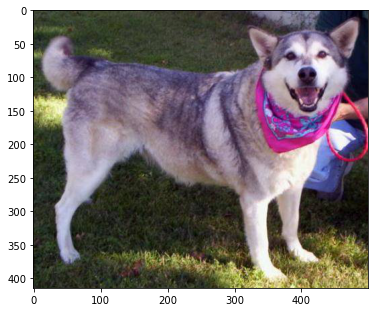

In [74]:
sample = random.choice(filenames)
image = load_img("./train/"+sample)
fig = plt.figure()
fig.set_size_inches(6,6)
plt.imshow(image);

# Deep learning model

In [67]:
from keras import layers, applications, optimizers, callbacks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Model, load_model
from keras.utils import plot_model, to_categorical

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 6
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.3
x = Dropout(0.3)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________________________________

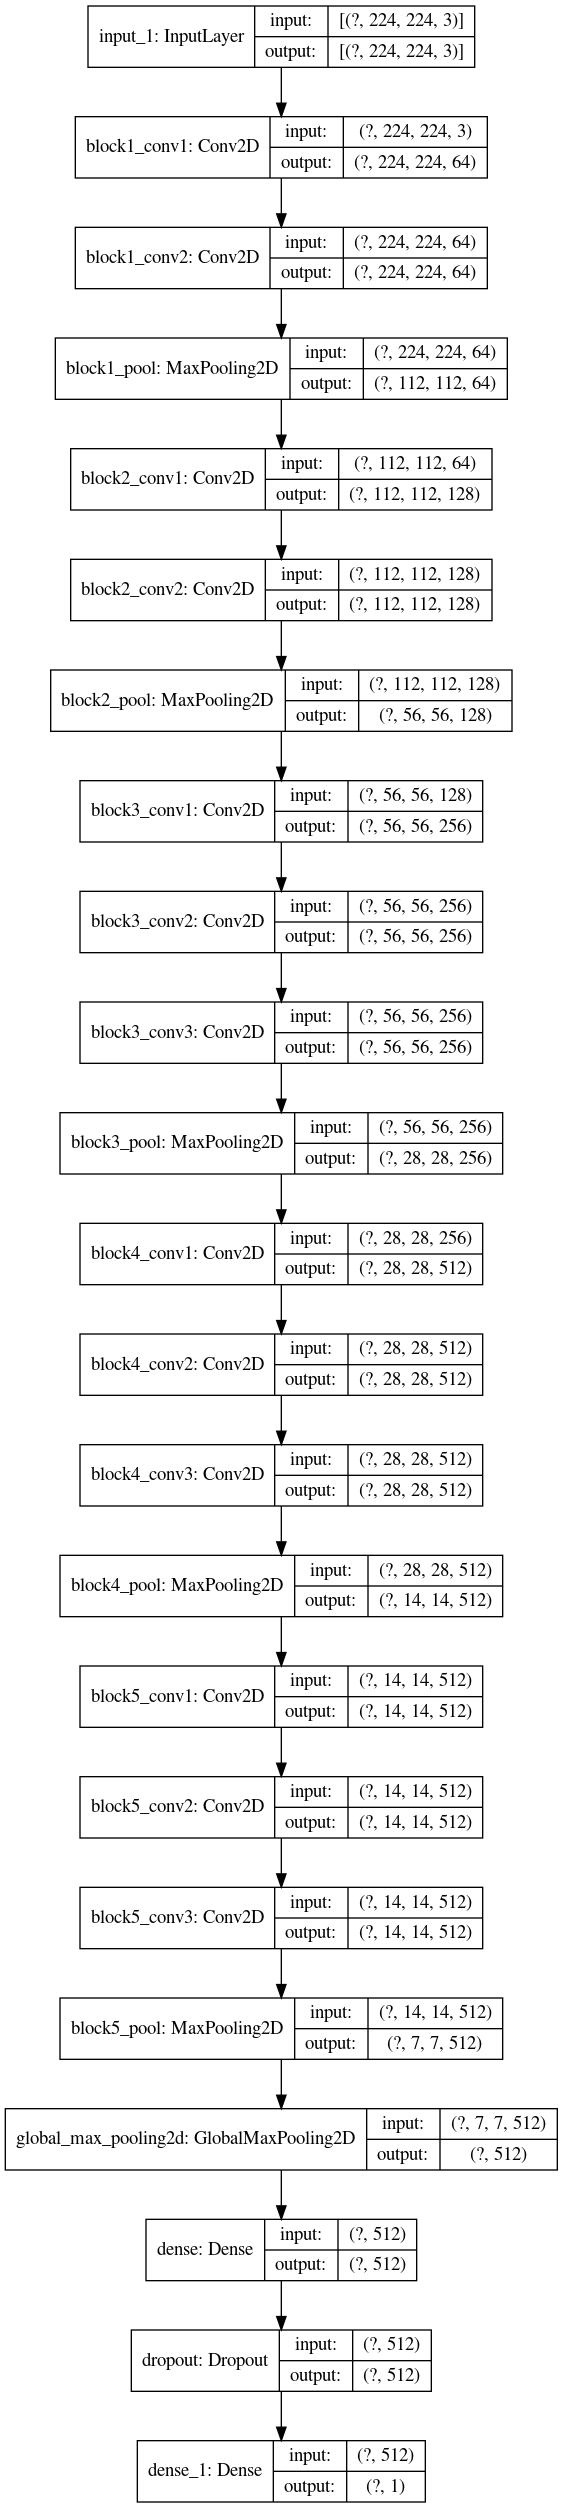

In [68]:
plot_model(model, to_file='/model_vgg16.png', show_shapes=True)

# Preprocessing the data for the model

In [69]:
df['category'] = df['category'].astype('str')

In [70]:
train_df, validate_df = train_test_split(df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [71]:
train_datagen = ImageDataGenerator(
    rotation_range=16,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train/",  
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 22500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


## Augment the data

Found 1 validated image filenames belonging to 1 classes.


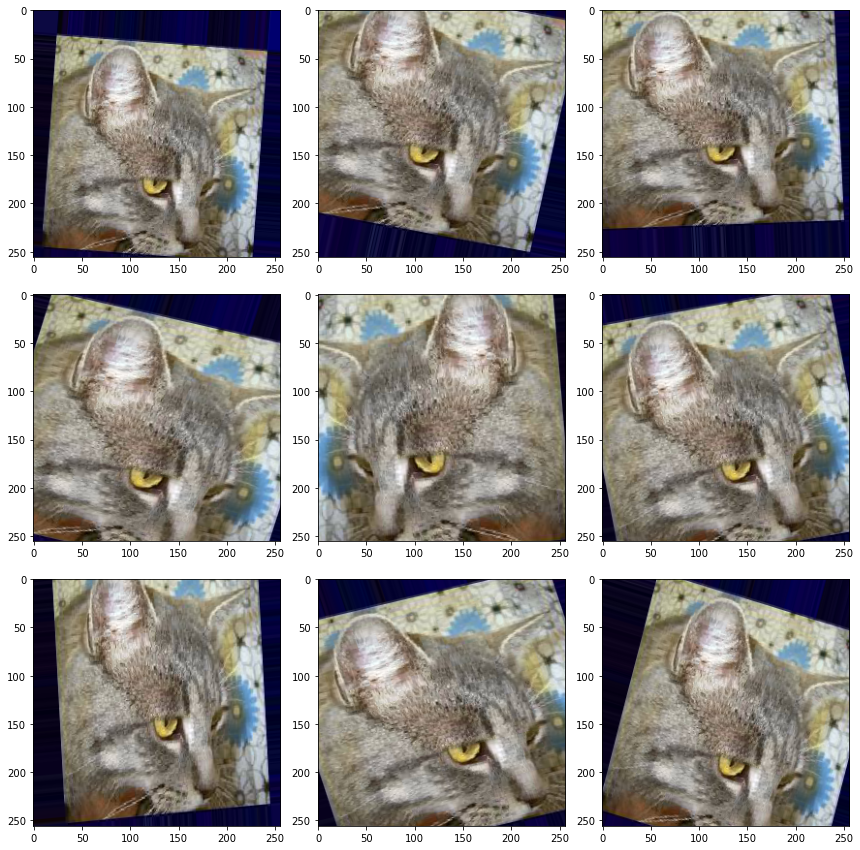

In [75]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
#     class_mode='binary'
)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Test if our model can recognize this image!

In [76]:
test_filenames = os.listdir("./test1/")
test_df = pd.DataFrame({
    'filename': test_filenames[:128]
})

nb_samples = test_df.shape[0]
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 128 validated image filenames.


In [77]:
# this may take a while
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

## check prediction results

Without training, the model just assigns every images it sees as a "dog" ("0" label).

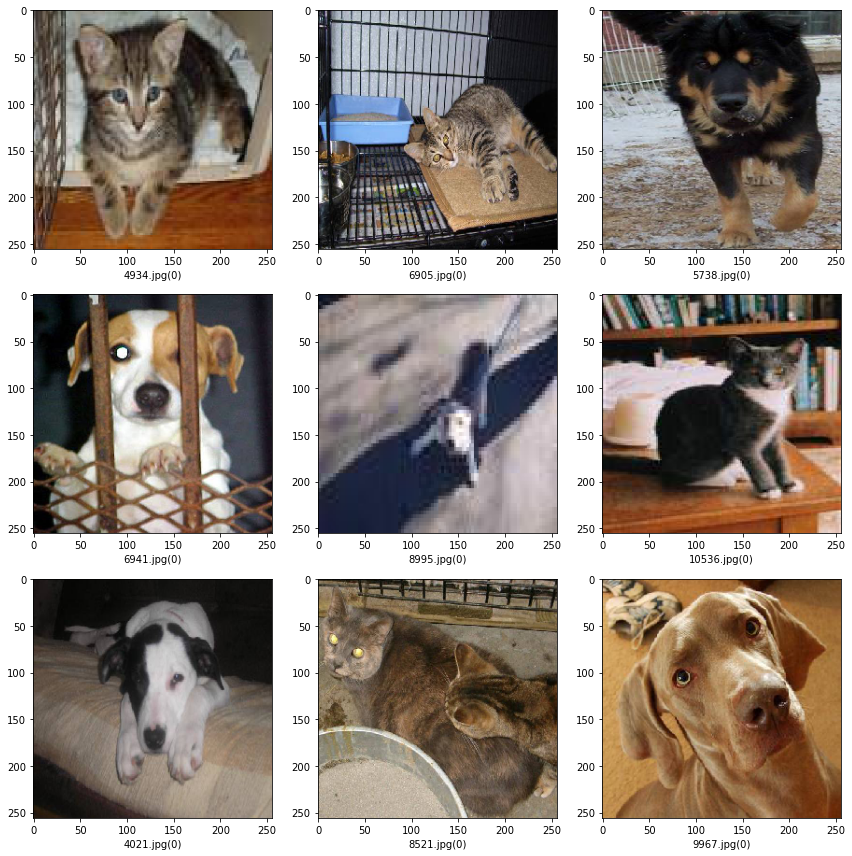

In [78]:
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./test1/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

# Now let's load a trained model

Imaging we have spent three days doing practice exam for the actual exam!

In [79]:
model = load_model('../input/vgg16catsvsdogs/model_0_vgg16.h5')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

## Let this model see the images again and check the results

In [80]:
# this may take a while
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

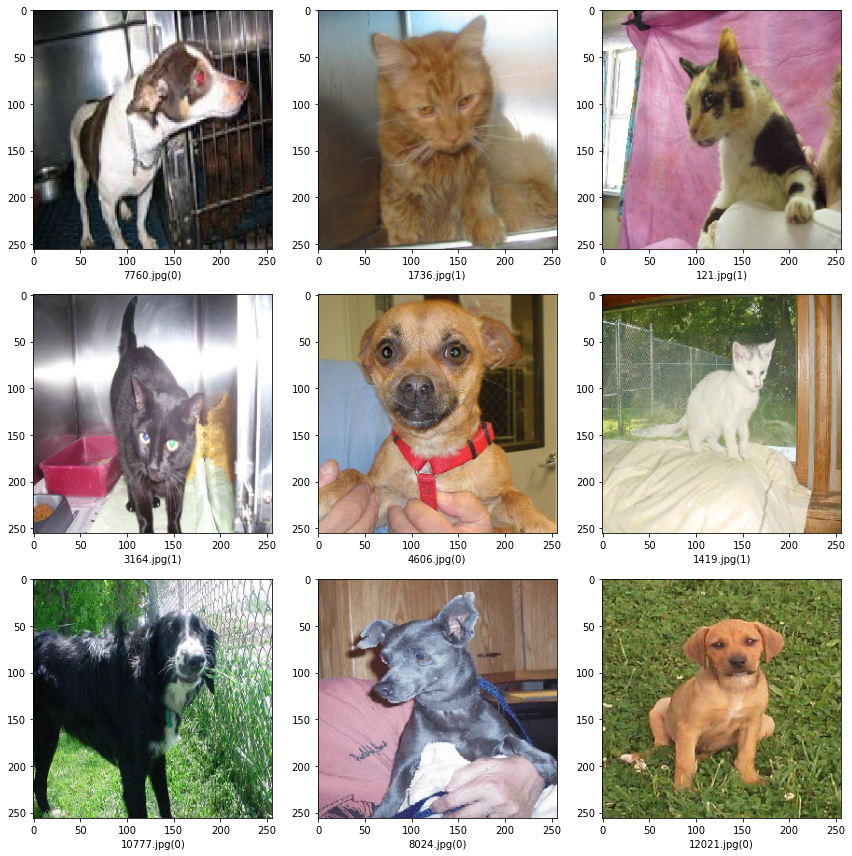

In [87]:
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./test1/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

## Pretty accurate! isn't it

# How this computer algorithm achieves that?!
long story...first we have to learn how computer represent images.

![](https://sites.wustl.edu/scao/files/2020/10/linear_dogs.jpg)

### Computer stores image as a "matrix"

In [88]:
# example of scalar, vector, matrix
s = 1.34992

In [89]:
v = [1, 3, 5.2]
print(v)

[1, 3, 5.2]


In [90]:
m = [[1,3], [8,9]]
print(m)

[[1, 3], [8, 9]]


In [91]:
m = np.array(m)
print(type(m))
print(m)

<class 'numpy.ndarray'>
[[1 3]
 [8 9]]


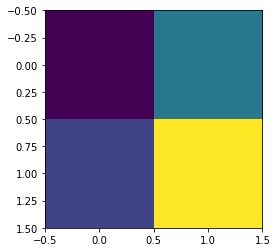

In [94]:
# example of imshow
a = np.array([[0,4], [2,10]])
plt.imshow(a);

## Let us load an image from Pokemon dataset

In [95]:
pokemon_filename = os.listdir("../input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/")

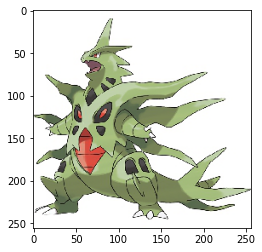

In [96]:
random_pokemon = random.choice(pokemon_filename)
G = plt.imread("../input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/"+random_pokemon)
plt.imshow(G)

## But what is G????

In [97]:
G

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [99]:
m.shape

(2, 2)

In [98]:
G.shape # 3 represents the Red, Green, Blue color 

(256, 256, 3)

In [100]:
# indexing
G1 = G[:,:,0] # take the red channel

In [103]:
G1.shape

(256, 256)

# G is a tensor!

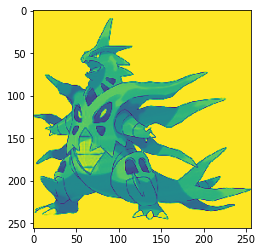

In [102]:
# show only 1 color channel
plt.imshow(G1)

## computer stores these images as tensors!

The name of the software package we are using is called tensorflow!
![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png)

# How computer learns?

Let us load some pokemon data.

In [104]:
pkmn = pd.read_csv('../input/pokemon/Pokemon.csv')

By just looking at a Pokemon's attributes (features), we will know which pokemon it is without knowing its name.

In [105]:
pkmn.sample(20)

#                   Name    Type 1    Type 2  Total  HP  Attack  \
3      3  VenusaurMega Venusaur     Grass    Poison    625  80     100   
15    12             Butterfree       Bug    Flying    395  60      45   
714  647   KeldeoResolute Forme     Water  Fighting    580  91      72   
742  674                Pancham  Fighting       NaN    348  67      82   
795  719                Diancie      Rock     Fairy    600  50     100   
91    84                  Doduo    Normal    Flying    310  35      85   
227  211               Qwilfish     Water    Poison    430  65      95   
568  509               Purrloin      Dark       NaN    281  41      50   
722  654                Braixen      Fire       NaN    409  59      59   
316  292               Shedinja       Bug     Ghost    236   1      90   
725  657              Frogadier     Water       NaN    405  54      63   
90    83             Farfetch'd    Normal    Flying    352  52      65   
286  263              Zigzagoon    Normal       NaN    240  38      30   
365  334                Altaria    Dragon    Flying    490  75      70   
528  476              Probopass      Rock     Steel    525  60      55   
101   94                 Gengar     Ghost    Poison    500  60      65   
462  415                 Combee       Bug    Flying    244  30      30   
52    47               Parasect       Bug     Grass    405  60      95   
617  556               Maractus     Grass       NaN    461  75      86   
479  431                Glameow    Normal       NaN    310  49      55   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
3        123      122      120     80           1      False  
15        50       90       80     70           1      False  
714       90      129       90    108           5      False  
742       62       46       48     43           6      False  
795      150      100      150     50           6       True  
91        45       35       35     75           1      False  
227       75       55       55     85           2      False  
568       37       50       37     66           5      False  
722       58       90       70     73           6      False  
316       45       30       30     40           3      False  
725       52       83       56     97           6      False  
90        55       58       62     60           1      False  
286       41       30       41     60           3      False  
365       90       70      105     80           3      False  
528      145       75      150     40           4      False  
101       60      130       75    110           1      False  
462       42       30       42     70           4      False  
52        80       60       80     30           1      False  
617       67      106       67     60           5      False  
479       42       42       37     85           4      False

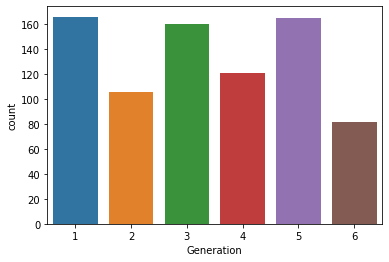

In [106]:
sns.countplot(pkmn['Generation']) # sns means seaborn

The Generation and Legendary variables were added to the dataset.
We are going to add a step here to drop the variables so that the presentation is simpler.

In [107]:
pkmn = pkmn.drop(['Generation', 'Legendary'],1)

## Features visualization

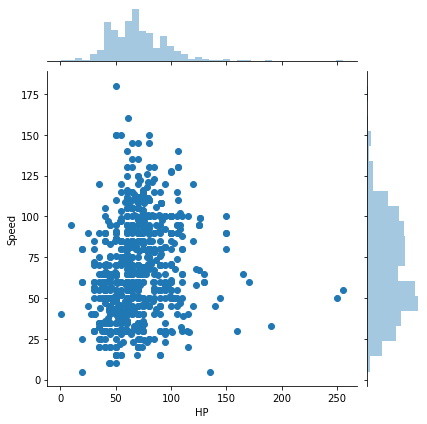

In [113]:
sns.jointplot(x="HP", y="Speed", data=pkmn);

In [ ]:
sns.jointplot(x="Attack", y="Defense", data=pkmn, kind='hex');

## Now let us go back to the VGG16 model!

# Summary:

1. Computer represents data as vector, matrix, or tensor.
2. Computer learns how to classify images using its features.
3. Our Neural network model (VGG16) uses mathematical operations to extract features from images.

Email: s.cao@wustl.edu